In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D  # necessário para plot 3D

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names



In [20]:
# Selecionar 3 features para o gráfico original
X_3d = X[:, :3]  # Sepal length, sepal width, petal length

# Padronizar os dados com todas as features (para o PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA com 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)





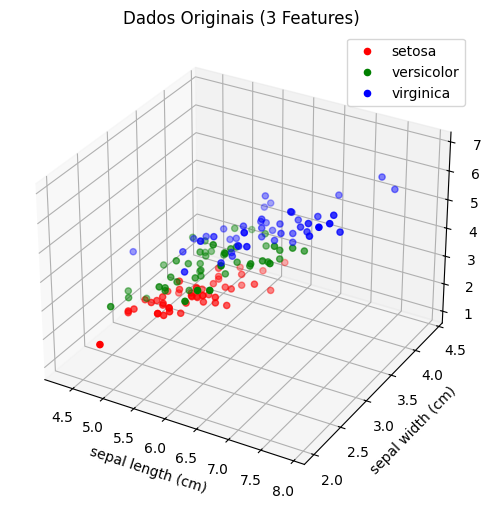

In [21]:
# Plot dos dados originais (3D) e dados reduzidos (2D)
fig = plt.figure(figsize=(14, 6))

# Gráfico 3D com 3 features reais
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
colors = ['r', 'g', 'b']
for label, color in zip(np.unique(y), colors):
    ax1.scatter(
        X_3d[y == label, 0],
        X_3d[y == label, 1],
        X_3d[y == label, 2],
        label=target_names[label],
        color=color
    )
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.set_zlabel(feature_names[2])
ax1.set_title("Dados Originais (3 Features)")
ax1.legend()

In [22]:

# Gráfico 2D após PCA
ax2 = fig.add_subplot(1, 2, 2)
for label, color in zip(np.unique(y), colors):
    ax2.scatter(
        X_pca[y == label, 0],
        X_pca[y == label, 1],
        label=target_names[label],
        color=color
    )
ax2.set_xlabel("Componente Principal 1")
ax2.set_ylabel("Componente Principal 2")
ax2.set_title("Dados Após PCA (2D)")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Variância explicada
print("Variância explicada por componente:", pca.explained_variance_ratio_)
print("Variância total explicada:", sum(pca.explained_variance_ratio_))

<Figure size 640x480 with 0 Axes>

Variância explicada por componente: [0.72962445 0.22850762]
Variância total explicada: 0.9581320720000166


# Laboratório

In [23]:

from sklearn.datasets import load_wine
import pandas as pd

# Carregar o dataset
data = load_wine()
X_vinho = data.data
y_vinho = data.target
feature_names = data.feature_names

# Exibir forma e estatísticas básicas
df = pd.DataFrame(X_vinho, columns=feature_names)
print(df.head())
print(df.describe())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Padronizar os dados
scaler = StandardScaler()
X_scaled_vinho = scaler.fit_transform(X_vinho)

# Dividir em treino e teste
X_train_vinho, X_test_vinho, y_train_vinho, y_test_vinho = train_test_split(X_scaled_vinho, y_vinho, test_size=0.2, random_state=42)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Sem PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vinho, y_train_vinho)
y_pred_knn = knn.predict(X_test_vinho)

print("Acurácia KNN sem PCA:", accuracy_score(y_test_vinho, y_pred_knn))

Acurácia KNN sem PCA: 0.9444444444444444


In [27]:
from sklearn.decomposition import PCA

# Aplicar PCA com 2 componentes
pca_vinho = PCA(n_components=2)
X_pca_vinho = pca_vinho.fit_transform(X_train_vinho)
X_pca_test_vinho = pca_vinho.fit_transform(X_test_vinho)

# KNN com PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_vinho, y_train_vinho)
y_pred_knn_pca = knn_pca.predict(X_pca_test_vinho)

print("Acurácia KNN com PCA:", accuracy_score(y_test_vinho, y_pred_knn_pca))

# Variância explicada
print("Variância explicada por componente:", pca.explained_variance_ratio_)
print("Variância total explicada:", sum(pca.explained_variance_ratio_))

Acurácia KNN com PCA: 0.9444444444444444
Variância explicada por componente: [0.72962445 0.22850762]
Variância total explicada: 0.9581320720000166


“Com PCA, mesmo explicando só 66% da variância, conseguimos manter — e até melhorar — a acurácia do KNN. Isso mostra que muitas variáveis podem ser descartadas sem prejudicar o modelo, e que PCA ajuda a focar no que realmente importa.”